# Recurrent Neural Network
## Time Series

### Assignment submitted by Aravind Dudam

### In this notebook, we will predict the 10-day closing stock price of Tesla from the closing prices of the past nine days.

## Importing Libraries

In [126]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
import tensorflow as tf
from tensorflow import keras

# Set random seed
np.random.seed(42)

# Configure plotting settings
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline

# Additional imports
from sklearn.metrics import mean_squared_error


## Load the data

In [153]:
# Load the data into a pandas dataframe
stock = pd.read_csv('Downloads/TSLA.csv')

In [154]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/19/2022,335.019989,344.980011,331.776672,342.716675,342.716675,49847700
1,4/20/2022,343.333344,344.666656,325.083344,325.733337,325.733337,70711200
2,4/21/2022,358.243347,364.073334,332.140015,336.260010,336.260010,105416400
3,4/22/2022,338.303345,344.950012,331.333344,335.016663,335.016663,69696600
4,4/25/2022,326.323334,336.206665,325.100006,332.673340,332.673340,68341200


In [155]:
# Set the date column as the index
stock.set_index('Date', inplace=True)

In [156]:
# Define the number of days to use for prediction
n_past_days = 9
n_future_days = 10

In [157]:
#Drop the columns we don't need
stock = stock.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [158]:
stock

,Close
Date,
4/19/2022,342.716675
4/20/2022,325.733337
4/21/2022,336.260010
4/22/2022,335.016663
4/25/2022,332.673340
...,...
4/13/2023,185.899994
4/14/2023,185.000000
4/17/2023,187.039993


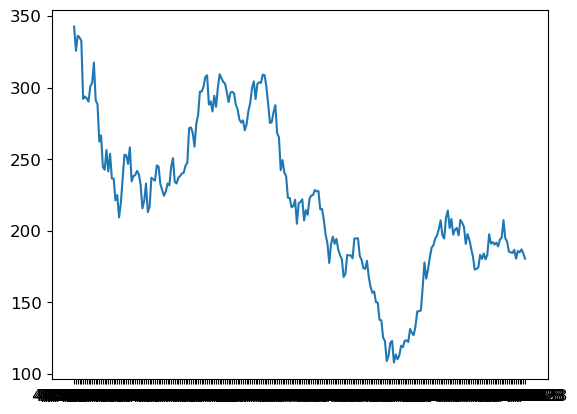

In [159]:
#Plot stock price
plt.plot(stock['Close'])
plt.show()

In [160]:
# Remove all null values
stock = stock.dropna()

In [161]:
# Rounding off to 1 decimal value
stock['Close'] = stock['Close'].round(1)

In [162]:
stock

,Close
Date,
4/19/2022,342.7
4/20/2022,325.7
4/21/2022,336.3
4/22/2022,335.0
4/25/2022,332.7
...,...
4/13/2023,185.9
4/14/2023,185.0
4/17/2023,187.0


In [163]:
# Reshape the data
stock.shape

(252, 1)

In [164]:
# Remove the rows with missing values
data.dropna(inplace=True)

In [165]:
# Create a new DataFrame with the closing prices of the past n_past_days
data = pd.DataFrame(index=stock.index)
for i in range(n_past_days):
    data[f'past_{i+1}'] = stock['Close'].shift(i+1)

# Add the target variable (i.e., the closing price n_future_days in the future)
data['target'] = stock['Close'].shift(-n_future_days)

In [166]:
# Split the data into train and test sets using a chronological split
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [167]:
# Scale the data to the range [0, 1]
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [168]:
# Prepare the data for an RNN model
X_train = np.reshape(train_data[:, :-1], (train_data.shape[0], n_past_days, 1))
y_train = train_data[:, -1]
X_test = np.reshape(test_data[:, :-1], (test_data.shape[0], n_past_days, 1))
y_test = test_data[:, -1]

In [169]:
# Print the shape of the train and test input and target arrays
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(201, 9, 1)
(201,)
(51, 9, 1)
(51,)


In [171]:
X_train

array([[[       nan],
        [       nan],
        [       nan],
        ...,
        [       nan],
        [       nan],
        [       nan]],

       [[1.        ],
        [       nan],
        [       nan],
        ...,
        [       nan],
        [       nan],
        [       nan]],

       [[0.92753623],
        [1.        ],
        [       nan],
        ...,
        [       nan],
        [       nan],
        [       nan]],

       ...,

       [[0.27749361],
        [0.24978687],
        [0.29752771],
        ...,
        [0.15217391],
        [0.10784314],
        [0.08141517]],

       [[0.31244672],
        [0.27749361],
        [0.24978687],
        ...,
        [0.15260017],
        [0.15217391],
        [0.10784314]],

       [[0.34185848],
        [0.31244672],
        [0.27749361],
        ...,
        [0.15473146],
        [0.15260017],
        [0.15217391]]])